# I. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## A redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \approx 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ij} X_{ik} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét. Ehelyett egy gyakran használt, egyszerűbb, de igen hasznos eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az illesztést a mérési adatok egy véletlen részhalmazára (pl. egyharmadára) végezzük el, majd egy másik véletlen részhalmazt választunk, mellyel ismét elvégezzük az illesztést, és így tovább. Kellően sokszor megismételve az eljárást az illesztési paraméterekre egy-egy eloszlást kapunk, melyeknek meghatározhatjuk a várható értékét, szórását és kovarianciáit. A legjobban illeszkedő modellparamétereknek tekinthetjük az eloszlások várható értékét, míg illesztési hibának a szórásukat.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## 1. feladat

Az alábbi függvény egy véletlenszerű adatsort generál. Írjunk rövid programot, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a programot, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen! Számítsuk ki a legjobban illeszkedő modell esetében a redukált $\chi^2$ értékét!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def some_random_coeffs():
    a = 10 * np.random.rand() - 2.5
    b = 20 * np.random.rand() - 5
    c = 100 * np.random.rand() - 50
    return a, b, c

def some_random_data(a, b, c, N):
    x = np.linspace(-N, N, 2 * N + 1)
    sigma = 10 * (np.random.rand(x.shape[0]) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    return x, y, sigma

def random_data_with_outliers(a, b, c, N, M):
    x, y, sigma = some_random_data(a, b, c, N)
    idx = np.random.randint(0, 2 * N, M)
    y[idx] = np.min(y) + np.random.rand() * (np.max(y) - np.min(y))
    return x, y, sigma

In [340]:
a, b, c = some_random_coeffs()
x, y, sigma = some_random_data(a, b, c, 10)
np.savetxt('adatsor.txt', np.transpose([x, y, sigma]))

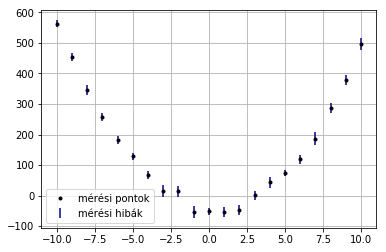

In [341]:
# ábra a mérési pontokkal és hibaintervallumokkal
plt.errorbar(x,y,sigma,linestyle ='',color='darkblue',label='mérési hibák')
plt.plot(x,y,marker='.',linestyle='',color='black',label='mérési pontok')
plt.grid()
plt.legend()

In [342]:
# az illesztést elvégző program helye

Mat = np.empty((x.shape[0],3))  # tervmátrixnak megfelelő hely lefoglalása

for i in range(x.shape[0]):   # tervmátrix feltöltése a megadott értékekkel
    for j in range(3):
        Mat[i,j] = (x[i]**j)/sigma[i]

b = np.empty((x.shape[0],1))    # b vektor helyének lefoglalása

for i in range(x.shape[0]):     # b vektor feltöltése elemekkel
    b[i] = (y[i])/sigma[i]

# mátrixműveletek elvégzése :
M = np.dot(Mat.T,Mat)
N = np.dot(Mat.T,b)
a = np.linalg.solve(M,N)     # 'a' tartalmazza a chi^2-et minimalizáló paramétereket
from numpy.polynomial.polynomial import polyval
z = polyval(x,a,False)         # polinomot készítünk x adataihoz felhasználva az 'a' minimalizált értékeket

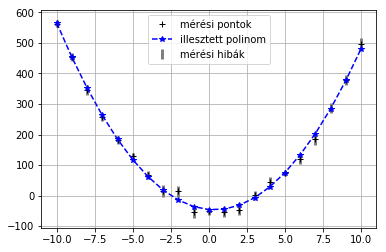

In [343]:
# ábra a legjobban illeszkedő modellel
plt.errorbar(x,y,sigma,ls='',c='grey',lw=3,label='mérési hibák')
plt.plot(x,y,marker='+',ls='',c='black',label='mérési pontok')
plt.plot(x,z,'--*',c='b',label='illesztett polinom')
plt.grid()
plt.legend()

#### Redukált $\chi^2$ kiszámítása

$\chi^2$ loszámolható a következőképpen:

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

Ebből pedig továbbszámítva a redukált $\chi^2$ értéke:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \approx 1$.

Ez alapján az előbb kiszámolt paramétereket felhasználva a redulált $\chi^2$ értéke:

In [344]:
# a redukált chi^2 értéke a legjobban illeszkedő modell esetére

# chi^2 értékének kiszámítása :
chi2 = ((z-y)**2)/(sigma**2)     
sum_chi2 = np.sum(chi2)

# redukált chi^2 :
v = len(x) - len(a)
r_chi2 = sum_chi2 / v

print(r_chi2)        # látszik, hogy a kapott érték valóban jól megközelíti az egyet

0.5260247100855823


## 2. feladat

Az alábbi függvényhívás olyan adatsort generál, amely kilógó (a megadott hibaértékkel nem jól jellemzett, vagy sok szigma értékkel eltérő) adatpontokat is tartalmaz. Írjunk programot, mely a $3\sigma$-nál jobban kilógó pontok elhagyásával, két lépésben, illetve iteratív módon végzi el a parabolaillesztést!

In [360]:
a, b, c = some_random_coeffs()
x, y, sigma = random_data_with_outliers(a, b, c, 10, 3)

In [2]:
# függvény polinom illesztéshez - kimenete az illesztett paraméterek
def illesztes(x,y,sigma):
    from numpy.polynomial.polynomial import polyval
    Mat = np.empty((x.shape[0],3))
    for i in range(x.shape[0]):   # tervmátrix feltöltése a megadott értékekkel
        for j in range(3):
            Mat[i,j] = (x[i]**j)/sigma[i]
            
    b = np.empty((x.shape[0],1))    # b vektor helyének lefoglalása
    for i in range(x.shape[0]):     # b vektor feltöltése elemekkel
        b[i] = (y[i])/sigma[i]

    M = np.dot(Mat.T,Mat)     # mátrixműveletek elvégzése :
    N = np.dot(Mat.T,b)
    a = np.linalg.solve(M,N)  # 'a' tartalmazza a chi^2-et minimalizáló paramétereket
    z = polyval(x,a,False)    # polinomot készítünk x adataihoz 
                              # felhasználva az 'a' minimalizált értékeket
    
    return z

In [3]:
# függvény a kilógó pontok eltűntetéséhez
# kimenetei a kilógó adatokat nem tartalmazó vektorok
def kivagas(x,y,sigma):
    z = illesztes(x,y,sigma)
    d = y-z                     # illesztett értékek és adatok eltérése
    o = 3*d.std()               # 3*szigma
    uj_y = y[abs(d) < o]        # csak a 3*szigma alatti értékeket tartalmazó adatsorok 
    uj_x = x[abs(d) < o]
    uj_sigma = sigma[abs(d) < o]
    return uj_x, uj_y, uj_sigma

In [363]:
kivagas(x,y,sigma)
xx= kivagas(x,y,sigma)[0]
yy= kivagas(x,y,sigma)[1]
ss= kivagas(x,y,sigma)[2]
zz=illesztes(xx,yy,ss)

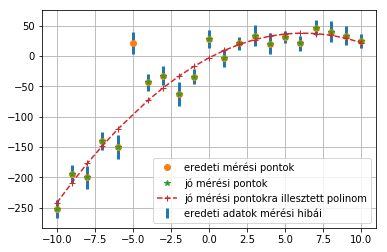

In [364]:
# ábrázolás :
plt.errorbar(x,y,sigma,ls='',lw=3,label='eredeti adatok mérési hibái')
plt.plot(x,y,marker='o',ls='',label='eredeti mérési pontok')
plt.plot(xx,yy,'*',label='jó mérési pontok')   # új pontok
plt.plot(xx,zz,'+--',label='jó mérési pontokra illesztett polinom')
plt.grid()
plt.legend()

## 3. feladat

Írjuk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

"A bevezetett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem."

In [365]:
def kov(Mat):    # ahol Mat a tervmátrix
    alfa = np.dot(Mat.T,Mat)   # szimmetrikus mátrix
    C = np.linalg.inv(alfa)    # kovariancia mátrix
    return C

In [366]:
kov(Mat)

array([[ 2.37486880e+01, -1.67684905e-01, -3.67020165e-01],
       [-1.67684905e-01,  2.89146270e-01,  1.18824092e-02],
       [-3.67020165e-01,  1.18824092e-02,  1.00567161e-02]])

## 4. feladat

Határozzuk meg a kilógó pontokat is tartalmazó adatsor esetében az illesztett parabola paramétereinek eloszlását és hibáját a bootstrap módszer segítségével. A bootstrap eljárás során az illesztést többször megismételjük oly módon, hogy mindig csak a mérési pontok egy véletlen részhalmazát (pl. 60%-át) használjuk fel az illesztéshez. Az így kapott illesztési paraméterekből készítsünk hisztogramot, valamint számítsuk ki a paraméterek várható értékét és szórását! Hasonlítsuk össze a kapott értékeket a kovarianciamátrixból számolt aszimptotikus hibával.

In [5]:
# adatsorok kilógó pontokkal :
a, b, c = some_random_coeffs()
x, y, sigma = random_data_with_outliers(a, b, c, 10, 3)

#adatsorok kilógó pontok nélkül :
#a, b, c = some_random_coeffs()
#x, y, sigma = some_random_data(a, b, c, 10)

In [4]:
# a bootstrap módszer megvalósítása :

# függvény az adatsorok részhalmazának kiválasztására majd azokra történő illesztésre :
# bemenete x,y,sigma az adatok, 'a': véletlen számok max. értéke és 'b': darabszáma
def reszh_ill2(x,y,sigma,a,b):
    A = np.zeros((b,4))
    import random
    index = [random.sample(range(0,a), b)]
    xx = x[index]
    yy = y[index]
    ss = sigma[index]
    zz = illesztes(xx,yy,ss)
    A[:,0] = xx
    A[:,1] = zz
    A[:,2] = yy
    A[:,3] = ss
    return A
# visszatér az 'A' mátrixszal, mely az új paramétereket tartalmazza a megfelelő oszlopaiban

In [6]:
# tetszőlegesen sok mintavételezéssel elvégezzük az illesztéseket :
fgh = reszh_ill2(x,y,sigma,21,15)
i = 0
while i <= 700:
    hmm = reszh_ill2(x,y,sigma,21,15)
    fgh=np.vstack((fgh,hmm[:,:]))
    i += 1

# a később ábrázolni kívánt értékeket, (x, illetve az illesztett z) külön listába szedjük
xxx = fgh[:,0]
zzz = fgh[:,1]

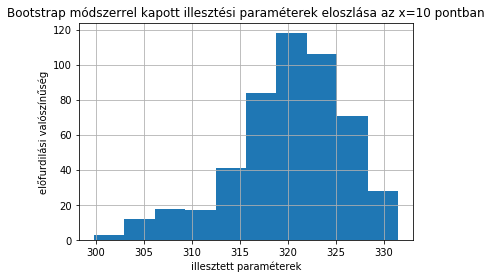

In [370]:
# a bootstrap módszerrel kapott illesztési paraméterek eloszlása -- ábrák :

# az összes paraméter eloszlásának ábrázolása helyett nézzünk meg tetszőleges két értéket
# x = 10 pontra illesztett értékek elolszlása :
plt.hist(zzz[xxx == 10])
plt.title('Bootstrap módszerrel kapott illesztési paraméterek eloszlása az x=10 pontban')
plt.ylabel('előfurdilási valószínűség')
plt.xlabel('illesztett paraméterek')
plt.grid()

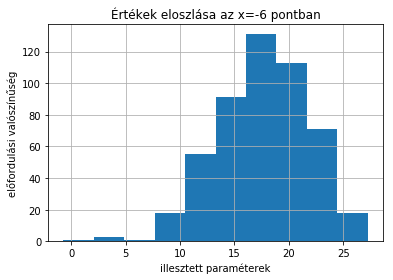

In [371]:
# x = -3 pontra illesztett értékek eloszlása :
plt.hist(zzz[xxx == -6])
plt.title('Értékek eloszlása az x=-6 pontban')
plt.xlabel('illesztett paraméterek')
plt.ylabel('előfordulási valószínűség')
plt.grid()
# ránézésre látszik, hogy Gauss-eloszlást követnek

In [36]:
# függbény a várható érték meghatározására :
# bemenete x: adatsor és kimenete maga a várható érték
def expval(x):  
    p = 1/len(x)
    sum = 0
    for i in range(0, len(x)): 
        sum += (x[i] * p)  
    return float(sum)


In [37]:
# a várható értékek, szórások és kovarianciák meghatározása :

# kovarianciák meghatározása :
kovar = np.zeros(len(x))
k = min(xxx)
while k <= max(xxx):
    for j in range(0,len(x)):
        kovar[j] = np.cov(zzz[xxx == k])
        j = j+1
        k = k+1

# szórások meghatározása :
szoras = np.zeros(len(x))
k = min(xxx)
while k <= max(xxx):
    for j in range(len(x)):
        szoras[j] = np.std(zzz[xxx == k])
        j = j+1
        k = k+1

# várható értékek meghatározása
k = min(xxx)
varhato = np.zeros(len(x))
while k <= max(xxx):
    for j in range(len(xxx)):
        varhato[j] = expval(zzz[xxx == k])
        j = j+1
        k = k+1
        
# a várható érték kiszámításánál hibaüzenetet kapok, de nem tudom miért
# egyébként kiszámolja jól, úgyhogy fogalmam sincs, mi a probléma. 

ZeroDivisionError: division by zero

Mivel tudjuk, hogy a várható értéket tekinthetjük a parabola illesztett értékeinek, illetve a kiszámolt szórásokat a hibáknak, így elkészíthetjük a parabolaillesztést.

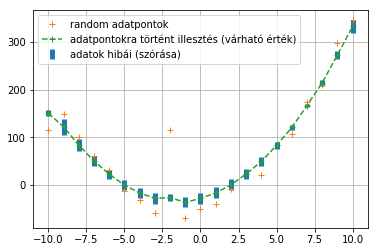

In [15]:
plt.errorbar(x,varhato,szoras,ls='',lw=5,label='adatok hibái (szórása)')
plt.plot(x,y,marker='+',ls='',label='random adatpontok')
plt.plot(x,varhato,'+--',label='adatpontokra történt illesztés (várható érték)')
plt.grid()
plt.legend()

## 5. feladat

A mellékelt fájlok olyan adatokat tartalmaznak, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével. A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja $k$ változó egész kitevőjű hatványainak szorzata. A többváltozós polinom fokszámát az a tag adja, melyben a hatványkitevők összege maximális. Például a

$$
p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3
$$

háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztés elvégzése után határozzuk meg az illesztési paraméterek hibáit, és keressünk módot arra, hogy miként ábrázolható a többváltozós illesztés jósága!

Adatfájlok:
    
* [small.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/small.dat.gz)
* [big.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/big.dat.gz)

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba

In [ ]:
# többváltozós illesztés